# 비전공자를 위한 AI 딥러닝(Deep Learning)


# MNIST 데이터 연습용
### 이건 처음부터 끝까지 내가 안 하고 gpt한테 맡겼다. 이정도로 잘하는게 놀라움 걍 내가 하는것보다 처음부터 gpt가 하는게 나은...

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# GPU 사용 가능 여부 확인
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 데이터셋 불러오기
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [3]:
# 데이터 로더 정의
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [4]:
#  mshow 함수 정의
def imshow(img):
    npimg = img.squeeze().numpy()  # 채널 차원을 제거하여 (28, 28) 형태로 변환
    plt.imshow(npimg, cmap='gray')  # 흑백 이미지로 출력
    plt.axis('off')
    plt.show()

In [5]:
# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__() # super가 붙는건 상위 클래스 호출하기 위해서 첫번째 인자는 현재 클래스 nn.module을 상속
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x): #이 부분이 약간 이해가 안 가네 그 파이토치로 구현되어있어서 어떻게 돌아갈지 헷갈리는구나
        x = x.view(x.size(0), -1)  # Flatten the input image
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [6]:
# 하이퍼파라미터 설정
input_size = 784  # 28x28  고정된 값
hidden_size = 300
num_classes = 10 # 고정된 값
learning_rate = 0.001
num_epochs = 10


In [7]:
#모델 , 손실함수 , 최적화 (진짜 파이토치 쓰면 편하구나 이걸 직접 구현하는거 언젠가 연습은 해야 하는데)
model = MLP(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
# 모델 학습
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

print('Training finished!')

Epoch [1/10], Step [100/938], Loss: 0.2342
Epoch [1/10], Step [200/938], Loss: 0.2081
Epoch [1/10], Step [300/938], Loss: 0.3961
Epoch [1/10], Step [400/938], Loss: 0.1857
Epoch [1/10], Step [500/938], Loss: 0.5151
Epoch [1/10], Step [600/938], Loss: 0.2643
Epoch [1/10], Step [700/938], Loss: 0.1618
Epoch [1/10], Step [800/938], Loss: 0.1000
Epoch [1/10], Step [900/938], Loss: 0.0623
Epoch [2/10], Step [100/938], Loss: 0.1068
Epoch [2/10], Step [200/938], Loss: 0.1284
Epoch [2/10], Step [300/938], Loss: 0.1074
Epoch [2/10], Step [400/938], Loss: 0.0746
Epoch [2/10], Step [500/938], Loss: 0.1058
Epoch [2/10], Step [600/938], Loss: 0.0908
Epoch [2/10], Step [700/938], Loss: 0.0430
Epoch [2/10], Step [800/938], Loss: 0.0522
Epoch [2/10], Step [900/938], Loss: 0.0464
Epoch [3/10], Step [100/938], Loss: 0.1437
Epoch [3/10], Step [200/938], Loss: 0.0784
Epoch [3/10], Step [300/938], Loss: 0.0973
Epoch [3/10], Step [400/938], Loss: 0.0588
Epoch [3/10], Step [500/938], Loss: 0.0864
Epoch [3/10

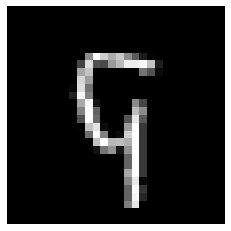

실제 라벨: 9, 예측 라벨: 5


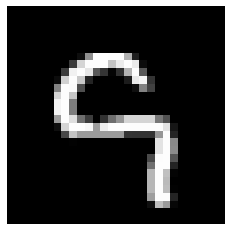

실제 라벨: 9, 예측 라벨: 5


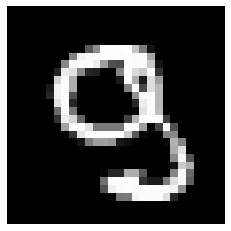

실제 라벨: 9, 예측 라벨: 8


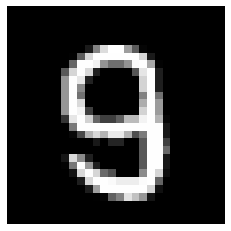

실제 라벨: 9, 예측 라벨: 5


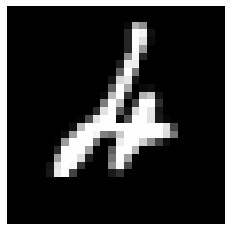

실제 라벨: 4, 예측 라벨: 2
Accuracy of the network on the 10000 test images: 98.046875 %


In [12]:
# 모델 평가 및 예측 실패 데이터 확인
model.eval() #사실 이걸 제대로 사용해본적이 없어서.. 나중에 뜯어볼 수 있으면 뜯어보자
with torch.no_grad():# 이미 학습이 끝나서 불필요
    correct = 0
    total = 0
    num_samples = 0  # 예측 실패 데이터의 수를 카운트하기 위한  수
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1) #★ _,는 사용하지 않은 변수들에 대한 광요 표현?
        total += labels.size(0)
        correct += (predicted == labels).sum().item() #sum().item 텐서의 스칼라값 어떻게 하는지 본 것 같은데 뭔가 생소하네

        # 예측 실패한 데이터 출력 (내가 가장 필요했던 것 대충은 알겠는데 아무래도 이 매소드 자체를 몰라서 정확히는 모르겠다.)
        incorrect_idx = (predicted != labels)
        if incorrect_idx.sum() > 0:
            incorrect_images = images[incorrect_idx]
            incorrect_labels = labels[incorrect_idx]
            incorrect_predictions = predicted[incorrect_idx]
            #정확하게는 이 코드 자체는 쉬운데 어떻게 저렇게 저장되고 만들어졌는지가 헷갈리네

            # 예측 실패 데이터 출력 (최대 3개)
            for idx in range(incorrect_idx.sum()):  
                imshow(incorrect_images[idx].cpu())
                print(f'실제 라벨: {incorrect_labels[idx]}, 예측 라벨: {incorrect_predictions[idx]}')
                num_samples += 1

       
        
        if num_samples >= 5:  # 원하는 개수만큼 출력하면 전체 반복문을 종료합니다.
            break

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')